# Import Necessary Packages and Models for ML

In [1]:
import numpy as np 

import pandas as pd

import seaborn as sns
sns.set_style('dark')

import matplotlib.pyplot as plt
%matplotlib inline

# ignore warning
import warnings
warnings.filterwarnings('ignore')



# 1. Data Collection

In [2]:
# Read Train.csv File 
trainDF = pd.read_csv('./../input/titanic/train.csv')

# show first five rows from training dataset
trainDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Read Test.csv File 
testDF = pd.read_csv('./../input/titanic/test.csv')

#  show 5 rows
testDF.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Print 5 Rows
testDF.head() # train() for last 5 rows

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
def show_shape(train, test):
    """ 
    display the shape of train and test DF 
    
    """   
    print(" Shape of Training DF", train.shape)
    print("")
    print(" Shape of Testing DF", test.shape)

In [6]:
#  to know shape of the training and testing data
show_shape(trainDF, testDF)

 Shape of Training DF (891, 12)

 Shape of Testing DF (418, 11)


In [7]:
def show_info(train, test):
    """ 
    display the Information of train and test DF 
    
    """
    
    print("Information of Training DF"+ "-"*10)
    print(train.info())
    print("")
    print("")
    print("")
    print("Information of Testing DF"+ "-"*10)
    print(test.info())

In [8]:
show_info(trainDF, testDF)

Information of Training DF----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None



Information of Testing DF----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------     

# 2. Feature Engineering

* Remvoe unnecessary features


In [9]:
trainDF = trainDF.drop(['Name'], axis=1)
trainDF.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Remve Cabin

trainDF = trainDF.drop(['Cabin'], axis=1) # remove from train DF
testDF = testDF.drop(['Cabin'], axis=1) # remove from test DF

In [11]:
# Remove Ticket

trainDF = trainDF.drop(['Ticket'], axis = 1)
testDF = testDF.drop(['Ticket'], axis = 1) 

In [12]:
# Age Feature

trainDF['Age'] = trainDF['Age'].fillna(trainDF['Age'].median()) # fill for train DF
testDF['Age'] = testDF['Age'].fillna(testDF['Age'].median()) # fill for test DF

In [13]:
# Fill to Embarked column NA with S
 
trainDF['Embarked'] = trainDF['Embarked'].fillna('S') # for train DF only


In [14]:
# Fill na with median for Fare feature

testDF["Fare"] = testDF["Fare"].fillna(testDF["Fare"].median()) # for test DF only

In [15]:
# show info of train and test data set by calling function

show_info(trainDF, testDF)

Information of Training DF----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None



Information of Testing DF----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         

# 3. Visualization



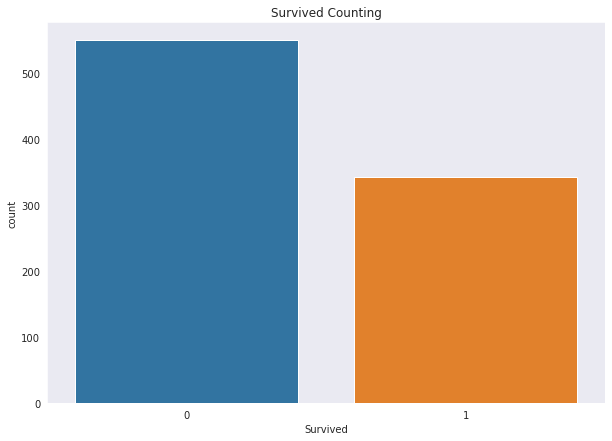

In [16]:
# Show servived graph

plt.figure(figsize=(10, 7))

sns.countplot(x ='Survived', data=trainDF, )
plt.title("Survived Counting")
plt.show()

<Figure size 720x504 with 0 Axes>

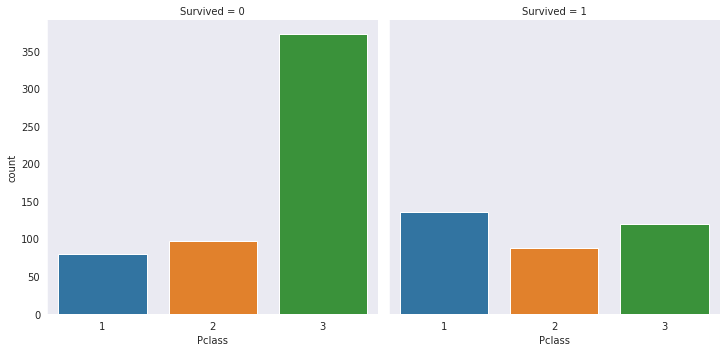

In [17]:
plt.figure(figsize=(10, 7))

sns.catplot(x="Pclass", col="Survived", data=trainDF, kind="count");

plt.show()

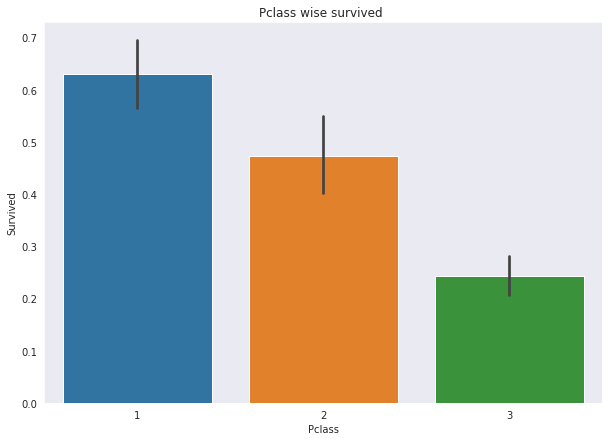

In [18]:
#  Pclass wise survived graph 


plt.figure(figsize=(10, 7))

sns.barplot(x= 'Pclass', y='Survived', data=trainDF)
plt.title("Pclass wise survived ")
plt.show()

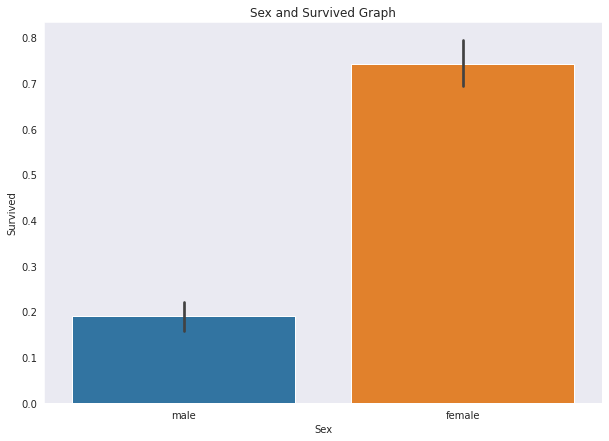

In [19]:
# Gender wise Survived graph

plt.figure(figsize=(10, 7))


sns.barplot(x='Sex', y = 'Survived', data= trainDF)
plt.title("Sex and Survived Graph")
plt.show()

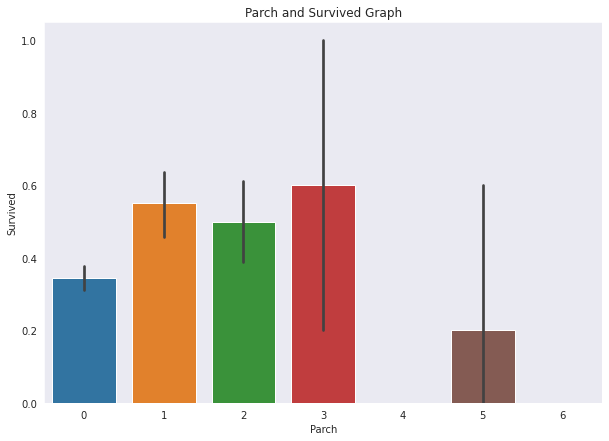

In [20]:
# Parch and Survived Bar graph

plt.figure(figsize=(10, 7))

sns.barplot(x = 'Parch', y= 'Survived', data= trainDF)
plt.title("Parch and Survived Graph")

plt.show()

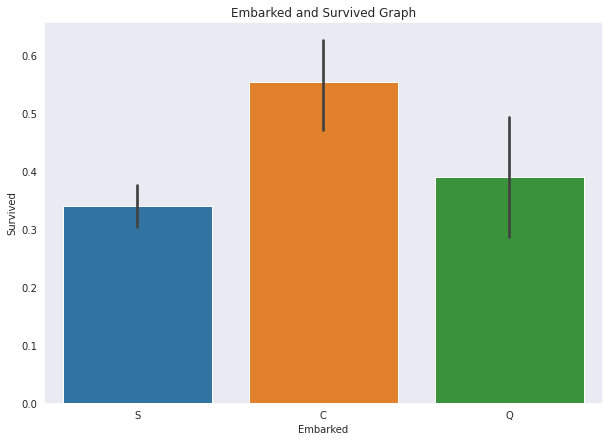

In [21]:
# Embarked and Survived bar Graph

plt.figure(figsize=(10, 7))

sns.barplot(x= 'Embarked', y = 'Survived', data= trainDF)
plt.title("Embarked and Survived Graph")

plt.show()

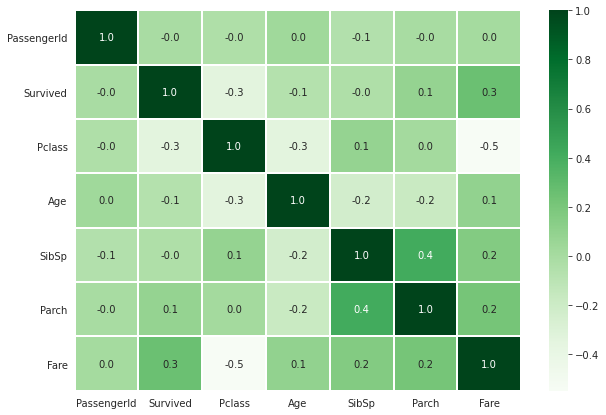

In [22]:
# heatmap show
plt.figure(figsize=(10, 7))
sns.heatmap(trainDF.corr(), cmap='Greens', linewidths=1, annot=True, fmt='.1f')

fig=plt.gcf()
plt.show()

In [23]:
# show the info
show_info(trainDF, testDF)

Information of Training DF----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None



Information of Testing DF----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         

In [24]:
# Convert sex object values to numeric male=1 and female=0, for both train and test DF

trainDF['Sex'] = trainDF['Sex'].replace({'male': 1, 'female': 0})
testDF['Sex'] = testDF['Sex'].replace({'male': 1, 'female': 0})


In [25]:
# count values for Embarked
print(testDF['Embarked'].value_counts())
print(trainDF['Embarked'].value_counts())


S    270
C    102
Q     46
Name: Embarked, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [26]:
#  Now, Replace with alphabets to Numbers, for both train and test DF

trainDF['Embarked'] = trainDF['Embarked'].replace({'C': 0, 'S': 1, 'Q': 2})
testDF['Embarked'] = testDF['Embarked'].replace({'C': 0, 'S': 1, 'Q': 2})

In [27]:
print(trainDF.head())
print(testDF.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         1
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         1
3            4         1       1    0  35.0      1      0  53.1000         1
4            5         0       3    1  35.0      0      0   8.0500         1
   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch     Fare  Embarked  
0  34.5      0      0   7.8292  

# 4. Model Prediction


In [28]:
# Set Prediction value

X_train = trainDF.drop(['PassengerId', 'Survived'], axis=1)
y_train = trainDF['Survived']
X_test = testDF.drop(['PassengerId', 'Name'], axis=1)



In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)


(891, 7)
(891,)
(418, 7)


In [30]:
# Load Model
from sklearn.tree import DecisionTreeClassifier


In [31]:

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [32]:
# To predict our model

pred = model.predict(X_test)
pred.shape

(418,)

In [33]:
# show prediction

accu = model.score(X_train, y_train) # model accuracy
print( "Model Prediction Score", (accu * 100).round(2))


Model Prediction Score 97.98


# 5. Model Submission

In [34]:
dict = {
    'PassengerId' : testDF['PassengerId'],
    'Survived' : pred
}

new_submission = pd.DataFrame(dict, )
new_submission.shape

(418, 2)

In [35]:
# Generate Submission File
# new_submission.to_csv('./my_new_submission.csv', index=False)
# print("Submission Successfully Saved...")

- 
Other Machine learning scores calculating.

In [36]:
# Import other Models Classes

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC, LinearSVC

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier

In [37]:
def model_wise_predict(models):
    """ 
    Model Predictions
    
    """
    ans_score = []
    for mdl, filename in models:
        m = mdl
        m.fit(X_train, y_train)
        pred = m.predict(X_test)
        m_accuracy = m.score(X_train, y_train)
        ans_score.append((m_accuracy*100).round(2))
        
        dict = {
            'PassengerId' : testDF['PassengerId'],
            'Survived' : pred
        }
        new_submission = pd.DataFrame(dict, )
        new_submission.to_csv(filename, index=False)
    return ans_score

In [38]:
#  Using DecisionTreeClassifier Model

#  make list of Models
models = [
    (DecisionTreeClassifier(), 'DTC_submission.csv'),
    (RandomForestClassifier(), 'RFC_submission.csv'),
    (LogisticRegression(), 'LR_submission.csv'),
    (LinearSVC(), 'SVC_submission.csv'),
    (GaussianNB(), 'GNB_submission.csv'),
    (SGDClassifier(), 'SGD_submission.csv'),
    (KNeighborsClassifier(), 'KNC_submission.csv')
]

data = model_wise_predict(models)
print("scores are", data)

scores are [97.98, 97.98, 79.69, 76.99, 79.12, 73.4, 80.7]


In [39]:

list_model_name = [
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'LogisticRegression', 
    'LinearSVC',
    'GaussianNB',
    'SGDClassifier', 
    'KNeighborsClassifier'
]


# Prediction Dashboard

In [40]:

modelDF = pd.DataFrame({"Model_Name" : list_model_name, "Pred_Score": data})
modelDF.sort_values(by='Pred_Score', ascending=False)
modelDF

,Model_Name,Pred_Score
0,DecisionTreeClassifier,97.98
1,RandomForestClassifier,97.98
2,LogisticRegression,79.69
3,LinearSVC,76.99
4,GaussianNB,79.12
5,SGDClassifier,73.40
6,KNeighborsClassifier,80.70
